<a href="https://colab.research.google.com/github/Sankarakumar6/ASSIGNMENTS/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
plt.style.use('ggplot')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/healthcare-dataset-stroke-data-full.csv")


In [ ]:
#univariate data undestanding - column - by - column understanding
#ID - has to be unique and wont contribute to prediction
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Have_they_gotten_stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.shape


(5110, 12)

In [ ]:
data.id.nunique()


5110

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


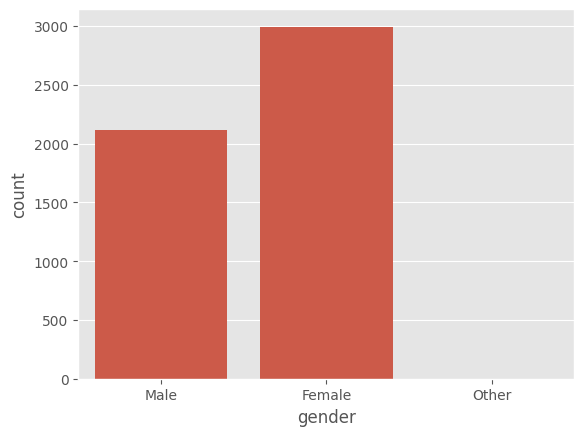

In [ ]:
#I should create a new encoding technique which will convert categorical to numerical and also solve the sparse issue
print(data.gender.value_counts())
ax = sns.countplot(data = data,x='gender')
plt.show()

In [ ]:
#just one row will have a '1' others will have no info for "Other"
pd.get_dummies(data['gender'])

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [ ]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5110 non-null   int64  
 1   gender                   5110 non-null   object 
 2   age                      5110 non-null   float64
 3   hypertension             5110 non-null   int64  
 4   heart_disease            5110 non-null   int64  
 5   ever_married             5110 non-null   object 
 6   work_type                5110 non-null   object 
 7   Residence_type           5110 non-null   object 
 8   avg_glucose_level        5110 non-null   float64
 9   bmi                      4909 non-null   float64
 10  smoking_status           5110 non-null   object 
 11  Have_they_gotten_stroke  5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


0    4612
1     498
Name: hypertension, dtype: int64


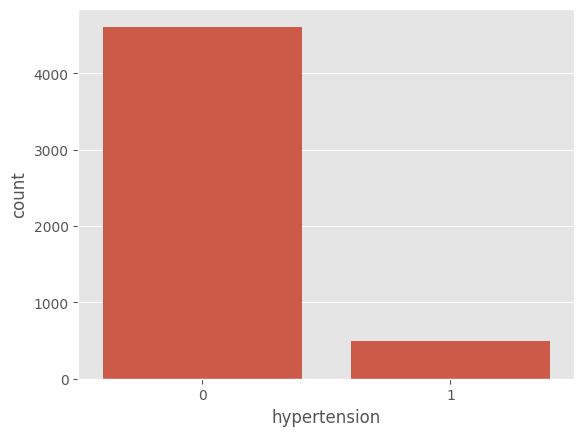

In [ ]:

#I should create a new encoding technique which will convert categorical to numerical and also solve the sparse issue
print(data.hypertension.value_counts())
ax = sns.countplot(data = data,x='hypertension')
plt.show()


0    4834
1     276
Name: heart_disease, dtype: int64


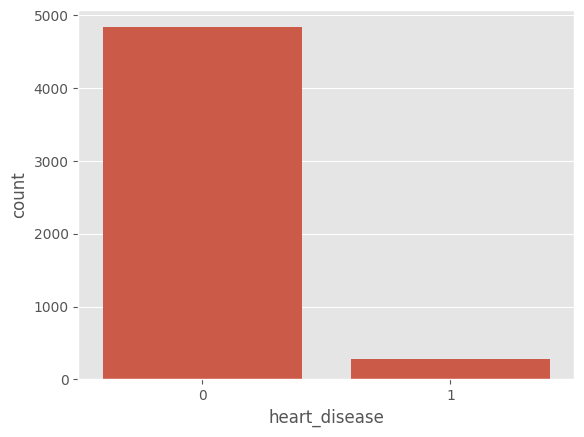

In [ ]:
#I should create a new encoding technique which will convert categorical to numerical and also solve the sparse issue
print(data.heart_disease.value_counts())
ax = sns.countplot(data = data,x='heart_disease')
plt.show()

0    4861
1     249
Name: Have_they_gotten_stroke, dtype: int64


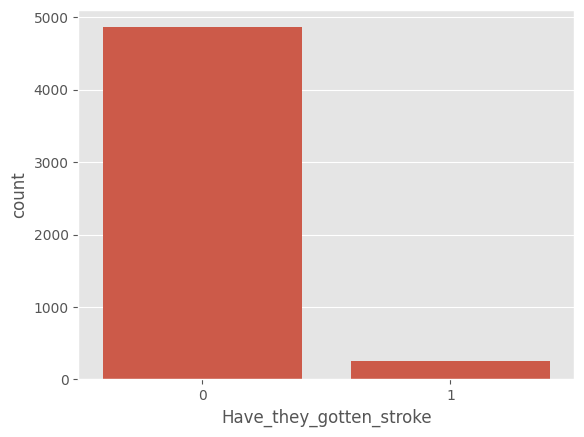

In [ ]:
#I should create a new encoding technique which will convert categorical to numerical and also solve the sparse issue
print(data.Have_they_gotten_stroke.value_counts())
ax = sns.countplot(data = data,x='Have_they_gotten_stroke')
plt.show()

<Axes: ylabel='Frequency'>

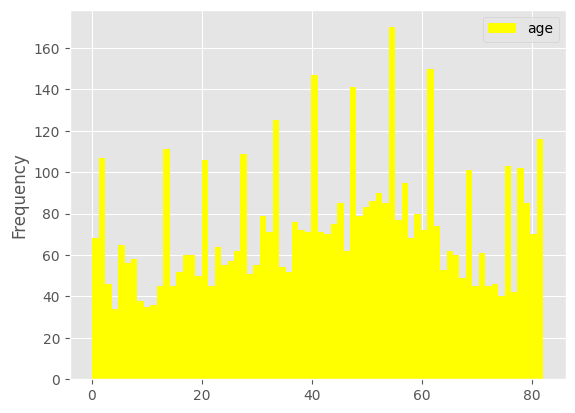

In [ ]:
data.plot(kind = 'hist', y = 'age', bins = 70,color = 'yellow' )


<Axes: ylabel='Frequency'>

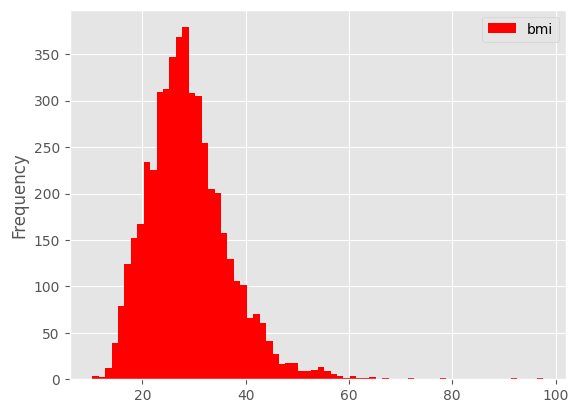

In [ ]:
data.plot(kind = 'hist', y = 'bmi', bins = 70,color = 'red' )

<Axes: ylabel='Frequency'>

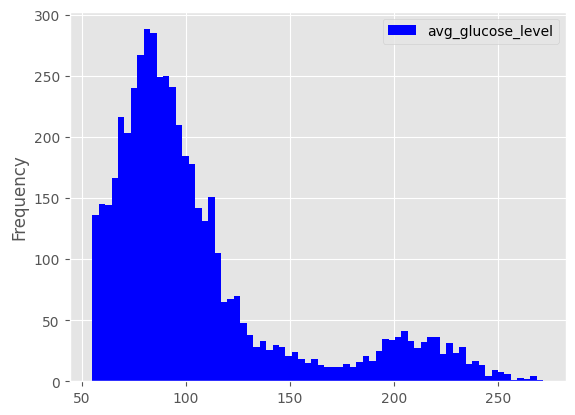

In [ ]:
data.plot(kind = 'hist', y = 'avg_glucose_level', bins = 70,color = 'b' )

<ipython-input-20-9e6216e88dd7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Have_they_gotten_stroke'] == 0]['bmi'], color = 'orange',label = 'No Stroke')
<ipython-input-20-9e6216e88dd7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Have_they_gotten_stroke'] == 1]['b

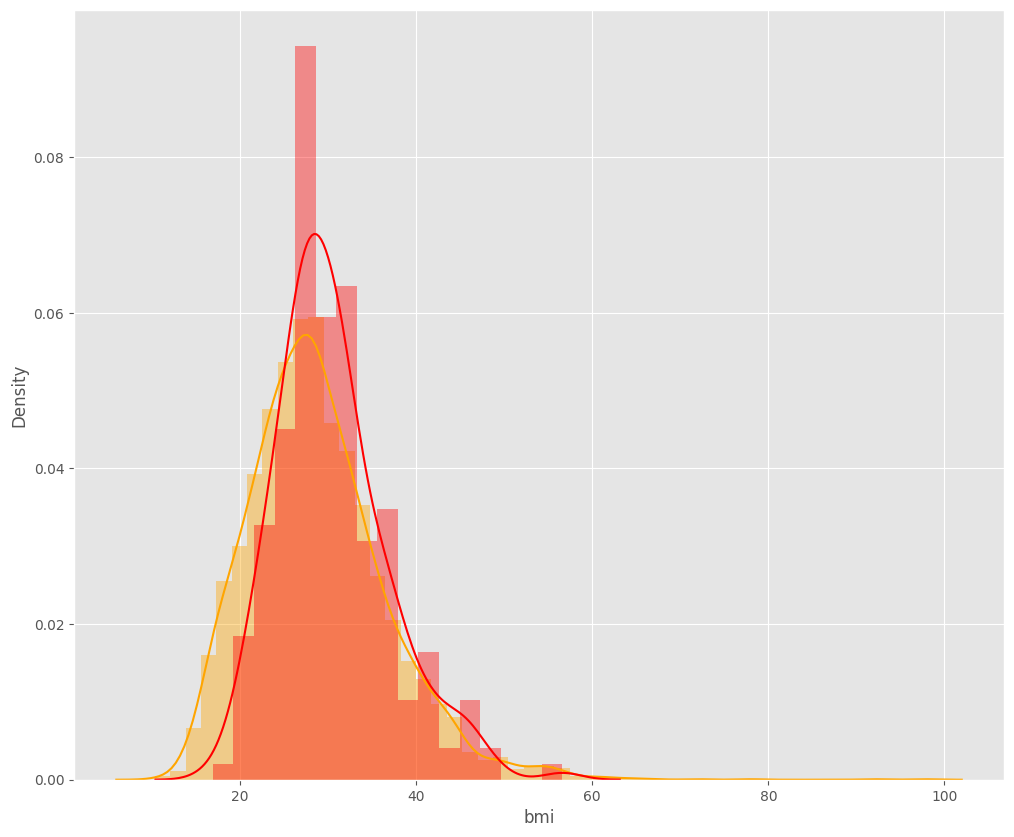

In [ ]:

plt.figure(figsize = (12,10))
sns.distplot(data[data['Have_they_gotten_stroke'] == 0]['bmi'], color = 'orange',label = 'No Stroke')
sns.distplot(data[data['Have_they_gotten_stroke'] == 1]['bmi'], color = 'red',label = 'Stroke')

plt.show()

In [ ]:
#1. Missing values in BMI  - done
#2. Imbalance when encoding - Fix this encoding issue - done
#3. Imbalanced Target
#4. Normalization
#5. Correlation and Multicolinearity - remove multicollinear variables - done

#To Check
#5. Check if outlier handling improves scores or not

In [ ]:
#handle the missing value
#Numerical - Mean() / Median()
#categorical - Mode()

#2 menthods
#1. Outlier fix
    #a. mean
    #b. Median
#2. KNN based imputation / Random forest (yet to be taught!)
mean_bmi = data['bmi'].mean()

data['bmi'].fillna(value = mean_bmi, inplace = True)

In [ ]:
#Categorical Encoders
!pip install category_encoders
from category_encoders.leave_one_out import LeaveOneOutEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
#Encoding - Non-number (computer can understand just numbers - (non numbers) convert into numbers)



In [ ]:
#just one row will have a '1' others will have no info for "Other"
pd.get_dummies(data['gender'])

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [ ]:
encoder = LeaveOneOutEncoder()
encoder.fit_transform(data['gender'], data['Have_they_gotten_stroke'])

,gender
0,0.050615
1,0.046776
2,0.050615
3,0.046776
4,0.046776
...,...
5105,0.047110
5106,0.047110
5107,0.047110
5108,0.051088


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(data['gender'])

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'Have_they_gotten_stroke'],
      dtype='object')

In [ ]:
data['sex'] = encoder.fit_transform(data['gender'], data['Have_they_gotten_stroke'])
data['Married'] = encoder.fit_transform(data['ever_married'], data['Have_they_gotten_stroke'])
data['Work'] = encoder.fit_transform(data['work_type'], data['Have_they_gotten_stroke'])
data['Residence'] = encoder.fit_transform(data['Residence_type'], data['Have_they_gotten_stroke'])
data['Smoker'] = encoder.fit_transform(data['smoking_status'], data['Have_they_gotten_stroke'])
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Have_they_gotten_stroke,sex,Married,Work,Residence,Smoker
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0.050615,0.065334,0.050616,0.051638,0.078054
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0.046776,0.065334,0.078240,0.044966,0.047065
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0.050615,0.065334,0.050616,0.044966,0.047065
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0.046776,0.065334,0.050616,0.051638,0.052030
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0.046776,0.065334,0.078240,0.044966,0.047065


In [ ]:
data_train = data.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis = 1)
data_train.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Have_they_gotten_stroke,sex,Married,Work,Residence,Smoker
0,9046,67.0,0,1,228.69,36.600000,1,0.050615,0.065334,0.050616,0.051638,0.078054
1,51676,61.0,0,0,202.21,28.893237,1,0.046776,0.065334,0.078240,0.044966,0.047065
2,31112,80.0,0,1,105.92,32.500000,1,0.050615,0.065334,0.050616,0.044966,0.047065
3,60182,49.0,0,0,171.23,34.400000,1,0.046776,0.065334,0.050616,0.051638,0.052030
4,1665,79.0,1,0,174.12,24.000000,1,0.046776,0.065334,0.078240,0.044966,0.047065


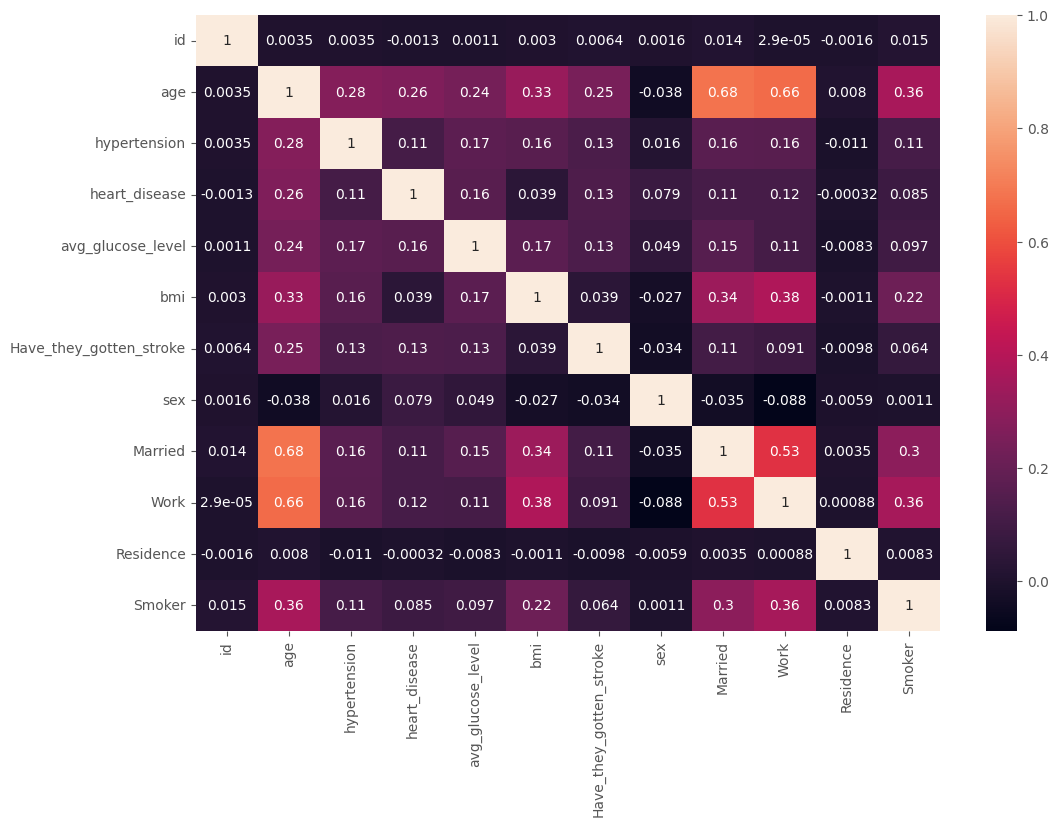

In [ ]:

plt.figure(figsize = (12,8))
ax = sns.heatmap(data_train.corr(), annot = True) #annot - annotations, fmt - format
plt.show()

In [ ]:
#droping columns with multicollinearity here!
def correlation(dataset,threshold):
  cols = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        cols.add(colname)
  return cols

In [ ]:
correlated_features = correlation(data_train,0.35)

In [ ]:
#Try without dropping??
correlated_features


{'Married', 'Smoker', 'Work'}

In [ ]:
data_train.drop(columns = ['id'], inplace = True)

In [ ]:
data_train  = data_train.drop(correlated_features, axis = 1)
data_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Have_they_gotten_stroke,sex,Residence
0,67.0,0,1,228.69,36.600000,1,0.050615,0.051638
1,61.0,0,0,202.21,28.893237,1,0.046776,0.044966
2,80.0,0,1,105.92,32.500000,1,0.050615,0.044966
3,49.0,0,0,171.23,34.400000,1,0.046776,0.051638
4,79.0,1,0,174.12,24.000000,1,0.046776,0.044966


In [ ]:
data_train.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,Have_they_gotten_stroke,sex,Residence
0,67.0,0,1,228.69,36.600000,1,0.050615,0.051638
1,61.0,0,0,202.21,28.893237,1,0.046776,0.044966
2,80.0,0,1,105.92,32.500000,1,0.050615,0.044966
3,49.0,0,0,171.23,34.400000,1,0.046776,0.051638
4,79.0,1,0,174.12,24.000000,1,0.046776,0.044966


In [ ]:
X = data_train.drop('Have_they_gotten_stroke', axis = 1)

y = data_train['Have_they_gotten_stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y, random_state = 24)

In [ ]:

from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()
Lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_train


205     1
3104    0
2991    0
3064    0
3342    0
       ..
485     0
4989    0
3853    0
1391    0
660     0
Name: Have_they_gotten_stroke, Length: 4088, dtype: int64

In [ ]:
y_pred = Lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[972   0]
 [ 50   0]]


In [ ]:
X_train


,age,hypertension,heart_disease,avg_glucose_level,bmi,sex,Residence
205,78.0,0,0,106.74,33.000000,0.046776,0.051638
3104,42.0,0,0,73.37,28.893237,0.047110,0.052023
2991,47.0,0,0,74.63,45.300000,0.047110,0.052023
3064,24.0,0,0,149.17,23.100000,0.047110,0.052023
3342,63.0,0,0,248.37,32.200000,0.051088,0.052023
...,...,...,...,...,...,...,...
485,31.0,0,0,98.99,31.200000,0.047110,0.052023
4989,11.0,0,0,123.04,15.900000,0.047110,0.045364
3853,47.0,0,0,157.77,28.400000,0.047110,0.045364
1391,74.0,0,0,61.78,25.800000,0.051088,0.052023


In [ ]:
#Augment the training data!! Artificially generate more data from lesser class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 24)

x_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
smote

SMOTE(random_state=24)

In [ ]:

Lr = LogisticRegression()
Lr.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [ ]:
x_train_smote


,age,hypertension,heart_disease,avg_glucose_level,bmi,sex,Residence
0,78.000000,0,0,106.740000,33.000000,0.046776,0.051638
1,42.000000,0,0,73.370000,28.893237,0.047110,0.052023
2,47.000000,0,0,74.630000,45.300000,0.047110,0.052023
3,24.000000,0,0,149.170000,23.100000,0.047110,0.052023
4,63.000000,0,0,248.370000,32.200000,0.051088,0.052023
...,...,...,...,...,...,...,...
7773,76.997008,0,0,90.074656,27.899601,0.048690,0.051638
7774,77.870846,0,0,108.921094,30.825831,0.046776,0.045828
7775,56.874214,0,0,91.277501,31.746698,0.050615,0.044966
7776,58.274010,0,0,72.977424,30.347672,0.046776,0.044966


In [ ]:
smote_data = x_train_smote.copy()


In [ ]:
smote_data['target'] = y_train_smote


In [ ]:
smote_data['target'].value_counts()


1    3889
0    3889
Name: target, dtype: int64

In [ ]:
smote_data.loc[smote_data['target'] == 1]


,age,hypertension,heart_disease,avg_glucose_level,bmi,sex,Residence,target
0,78.000000,0,0,106.740000,33.000000,0.046776,0.051638,1
23,68.000000,1,1,271.740000,31.100000,0.050615,0.044966,1
42,76.000000,0,0,140.100000,29.900000,0.050615,0.051638,1
51,73.000000,1,0,190.140000,36.500000,0.046776,0.044966,1
153,57.000000,0,0,84.960000,36.700000,0.050615,0.044966,1
...,...,...,...,...,...,...,...,...
7773,76.997008,0,0,90.074656,27.899601,0.048690,0.051638,1
7774,77.870846,0,0,108.921094,30.825831,0.046776,0.045828,1
7775,56.874214,0,0,91.277501,31.746698,0.050615,0.044966,1
7776,58.274010,0,0,72.977424,30.347672,0.046776,0.044966,1


In [ ]:
y_pred = Lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[720 252]
 [ 19  31]]


In [ ]:
from sklearn import tree

In [ ]:

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

[Text(0.4852941176470588, 0.95, 'x[5] <= 0.047\ngini = 0.093\nsamples = 4088\nvalue = [3889, 199]'),
 Text(0.4264705882352941, 0.85, 'gini = 0.0\nsamples = 121\nvalue = [0, 121]'),
 Text(0.5441176470588235, 0.85, 'x[6] <= 0.045\ngini = 0.039\nsamples = 3967\nvalue = [3889, 78]'),
 Text(0.4852941176470588, 0.75, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.6029411764705882, 0.75, 'x[0] <= 56.5\ngini = 0.021\nsamples = 3931\nvalue = [3889, 42]'),
 Text(0.38235294117647056, 0.65, 'x[4] <= 41.05\ngini = 0.003\nsamples = 2769\nvalue = [2765, 4]'),
 Text(0.17647058823529413, 0.55, 'x[0] <= 47.5\ngini = 0.001\nsamples = 2559\nvalue = [2558, 1]'),
 Text(0.11764705882352941, 0.45, 'gini = 0.0\nsamples = 2052\nvalue = [2052, 0]'),
 Text(0.23529411764705882, 0.45, 'x[0] <= 48.5\ngini = 0.004\nsamples = 507\nvalue = [506, 1]'),
 Text(0.17647058823529413, 0.35, 'x[3] <= 84.29\ngini = 0.046\nsamples = 42\nvalue = [41, 1]'),
 Text(0.11764705882352941, 0.25, 'x[3] <= 82.53\ngini = 0.124\nsamp

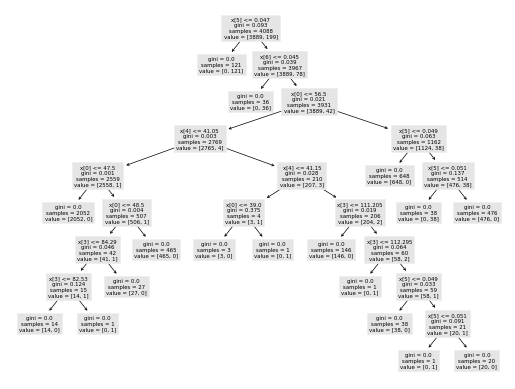

In [ ]:
tree.plot_tree(clf)


In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[970   2]
 [  1  49]]


[Text(0.6666666666666666, 0.875, 'x[6] <= 0.052\ngini = 0.5\nsamples = 7778\nvalue = [3889, 3889]'),
 Text(0.5, 0.625, 'x[6] <= 0.045\ngini = 0.442\nsamples = 5805\nvalue = [1916, 3889]'),
 Text(0.3333333333333333, 0.375, 'x[6] <= 0.045\ngini = 0.452\nsamples = 2926\nvalue = [1916, 1010]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1010\nvalue = [0, 1010]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1916\nvalue = [1916, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2879\nvalue = [0, 2879]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 1973\nvalue = [1973, 0]')]

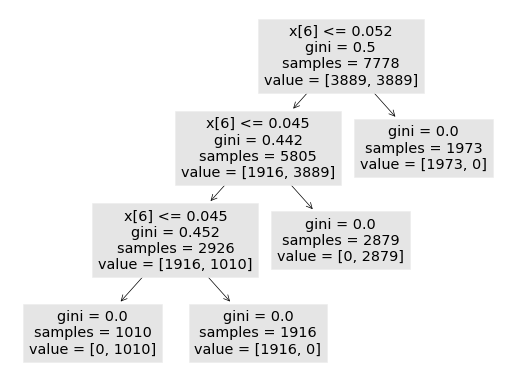

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_smote,y_train_smote)
tree.plot_tree(clf)

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[972   0]
 [  0  50]]


In [ ]:
#0 - 3800 - Majority
#1 - 1990 - Minority